# EDA

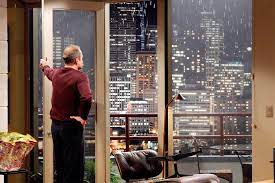

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Import the data


In [2]:
data_f = pd.read_csv('./data/King_County_House_prices_dataset.csv', parse_dates=[1])


 - create a whole overview of the values in the columns
 <br>
    ```
      for item in data_f.columns:
          print(f'item: {item}, {data_f[item].unique()}')
    
    ```
   output: [data exploration](data/Data_exploration.txt)

- how many items do we have

In [3]:
# shape of data: we start with 21 597 values
data_f.shape # shape (21597, 21)

(21597, 21)

- convert sqft int qm to easaly interprete the values

In [4]:
# create new column for m2
data_f['m2_living'] = data_f['sqft_living'] / 10.746
data_f['m2_lot'] = data_f['sqft_lot'] / 10.746

# create a new column y_m
data_f['year_month']= data_f['date'].dt.strftime('%Y-%m') # 7899 values

# create a new column price / sqft_living
data_f['sqft_price'] = data_f['price'] / data_f['sqft_living']



### Cleaning data

In [5]:
# fill NaN Values
data_f.fillna(0, inplace=True)

##### Outliers

In [6]:
data_f.drop(data_f.loc[(data_f['price'] >=1500000)].index, inplace=True)
data_f.shape


(21062, 25)

In [7]:
#Removing all Outliers or data not of interest

# remove more than 100 years and no renovated
m100_no_ren = data_f[(data_f['yr_built'] <=1938) & (data_f['yr_renovated']==0)] 
data_f.drop(data_f.loc[(data_f['yr_built'] <=1938) & (data_f['yr_renovated']==0)].index, inplace=True) # 18 869 left

# choosing only with bedrooms > 4
data_f.drop(data_f.loc[data_f['bedrooms'] <4].index, inplace=True) #  7900 left

# possible outlier house with 33 bedrooms
data_33b = data_f[(data_f['bedrooms'] >33)] #outlier 150m2 for 33 bedrooms, means 4m2 each room. outlier
data_33b

# remove row with bedroom value == 33
data_f.drop(data_f.loc[data_f['bedrooms'] == 33].index, inplace=True) # 7899
data_f.shape



# remove condition 1: very bad condition (only 1)
data_f.drop(data_f.loc[(data_f['condition'] ==1)].index, inplace=True) # 7898 left
data_f.shape

# remove m2_living < 100
# wanted to remove it but it could be paussible and an option for Mr. Hansen

# remove all price over 1.5M
data_f.drop(data_f.loc[(data_f['price'] >=1500000)].index, inplace=True) # 7530 left
data_f.shape



(7530, 25)

after removing outliers we have a dataset with 7530 items

- understanding data: datetime


|2014-5 | 2015-5 |
:--------:|:------:
![](pictures/2014-5-sqft_price.png)| ![](pictures/2015-5-sqft_price.png)|
|10x more counts |last value 2015-05-15|


In [8]:
#space to look for anomalities

data_exp = data_f[(data_f['date'] >='2015-05-01')]
# 
# data_exp = data_f[(data_f['date'] >='2014-05-01')& (data_f['date'] >'2014-06-01')] # 23 vs 21 586

#data_33b.sort_values('yr_built').drop(['id', 'waterfront', 'view', 'lat', 'long', 'zipcode'], axis=1)
# remove more than 100 years and no renovated
#m100_no_ren = data_f[(data_f['yr_built'] <=1920) & (data_f['yr_renovated']==0)] # 1366 VALUES
#m100_no_ren.sort_values('yr_built').drop(['id', 'waterfront', 'view', 'lat', 'long', 'zipcode'], axis=1)
n = data_exp.sort_values('date').drop(['id', 'waterfront', 'view', 'lat', 'long', 'zipcode'], axis=1)
n.date.tail(10)



7343    2015-05-13
21072   2015-05-13
13755   2015-05-13
21434   2015-05-14
20456   2015-05-14
19381   2015-05-14
7217    2015-05-14
15797   2015-05-14
11548   2015-05-14
5632    2015-05-15
Name: date, dtype: datetime64[ns]

- correlation matrix
<br><br>

        ```
        corr_data = data_f.drop(['id',], axis = 1)
        plt.figure(figsize=(20, 17))
        matrix = np.triu(corr_data.corr())
        sns.heatmap(corr_data.corr(), annot=True,
                    linewidth=.8, mask=matrix, cmap="rocket")
        ```

![correlation matrix](pictures/correlation_matrix.png)


the correlation matrix give a short overview about the relationship between the features

- visual inspection of the distribution of the data

In [49]:
# example: inspection of variables distributions
# ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
##       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
 #      'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
 ##      'lat', 'long', 'sqft_living15', 'sqft_lot15', 'm2_living', 'm2_lot',
  #     'year_month', 'sqft_price']

# statistical inspection
data_f.price.describe() 

# visual inspection 
#for column in data_exp.columns:
#sns.histplot(data = data_f, x='condition')
# data_f.drop(data_f.loc[(data_f['yr_renovated']==0)].index, inplace=True)
#sns.histplot(data = data_f, x='sqft_price')



count      7530.000
mean     586982.740
std      269337.708
min      100000.000
25%      374912.500
50%      535000.000
75%      749475.000
max     1490000.000
Name: price, dtype: float64

## 1Q: Is the price influenced by the number of rooms?

<AxesSubplot:xlabel='price', ylabel='Count'>

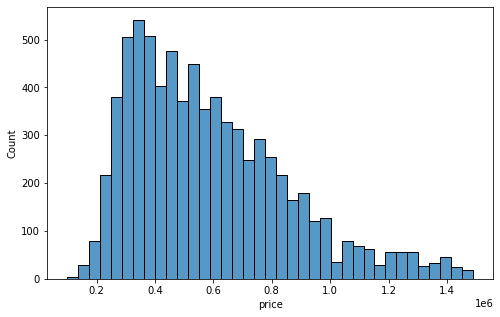

In [10]:
# near inspection into price data
data_f.sort_values('yr_built').yr_built.describe() 
# mean  ≠658774.377

#data_f.price.plot(kind='box')
sns.histplot(data = data_f, x='price')
#TODO maybe I can take it to show the distribution of the prices for houses with more than 4 bedrooms

In [11]:
# bedrooms against price
# group by bedrooms, computing mean, min and max for plot
bedroom_price_mean = data_f.groupby(['bedrooms']).mean().price.reset_index() # TODO generate the standard deviation
bedroom_price_min = data_f.groupby(['bedrooms']).min().price.reset_index()
bedroom_price_max = data_f.groupby(['bedrooms']).max().price.reset_index()
bedroom_price_max

,bedrooms,price
0,4,1490000.000
1,5,1490000.000
2,6,1490000.000
3,7,1240000.000
4,8,900000.000
5,9,1280000.000
6,10,1150000.000
7,11,520000.000


In [12]:
# concat

bedroom_price_df = pd.concat([bedroom_price_max, bedroom_price_mean, bedroom_price_min],
        axis=1,
        keys=['max', 'mean', 'min'],
        ignore_index=False, 
        join ='inner'
        )                       # TODO do the dataframe more beatifull
                                # TODO maybe a merge?  
bedroom_price_df




max                 mean                 min           
  bedrooms       price bedrooms      price bedrooms      price
0        4 1490000.000        4 572852.834        4 100000.000
1        5 1490000.000        5 642325.551        5 133000.000
2        6 1490000.000        6 638801.505        6 175000.000
3        7 1240000.000        7 658072.036        7 280000.000
4        8  900000.000        8 559428.571        8 340000.000
5        9 1280000.000        9 865000.000        9 450000.000
6       10 1150000.000       10 900000.000       10 650000.000
7       11  520000.000       11 520000.000       11 520000.000

In [13]:
#rename the columns DO only once
bedroom_price_df.columns = ['_'.join(col).strip() for col in bedroom_price_df.columns.values]


In [14]:
bedroom_price_df
# TODO remove the other bedrooms, only a column is enough

,max_bedrooms,max_price,mean_bedrooms,mean_price,min_bedrooms,min_price
0,4,1490000.000,4,572852.834,4,100000.000
1,5,1490000.000,5,642325.551,5,133000.000
2,6,1490000.000,6,638801.505,6,175000.000
3,7,1240000.000,7,658072.036,7,280000.000
4,8,900000.000,8,559428.571,8,340000.000
5,9,1280000.000,9,865000.000,9,450000.000
6,10,1150000.000,10,900000.000,10,650000.000
7,11,520000.000,11,520000.000,11,520000.000


Text(0.5, 1.0, 'Real State Price depending on Bedrooms')

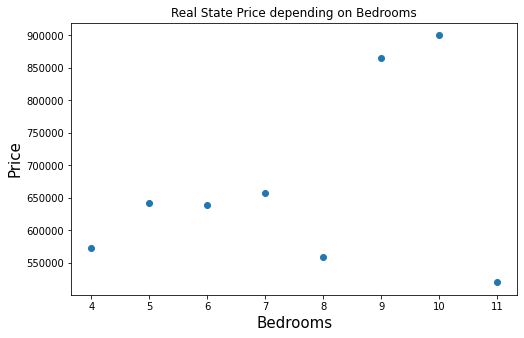

In [15]:
# plot
plt.figure()

sc = plt.scatter(bedroom_price_df.max_bedrooms,
            bedroom_price_df.mean_price,
            cmap='viridis',
            )
#plt.grid(True)
plt.xlabel('Bedrooms', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Real State Price depending on Bedrooms')

# TODO better scale
# TODO why with higher amount


## Q1-1 Does the renovation relates to the bedrooms and the price?

In [16]:
# bedrooms against price
# group by bedrooms, computing mean, min and max for plot
bedroom_price_mean = data_f[['bedrooms', 'price', 'condition']].groupby(['bedrooms']).mean().reset_index() # TODO generate the standard deviation
bedroom_price_min = data_f[['bedrooms', 'price', 'condition']].groupby(['bedrooms']).min().reset_index()
bedroom_price_max = data_f[['bedrooms', 'price', 'condition']].groupby(['bedrooms']).max().reset_index()
bedroom_price_mean

,bedrooms,price,condition
0,4,572852.834,3.351
1,5,642325.551,3.411
2,6,638801.505,3.433
3,7,658072.036,3.357
4,8,559428.571,3.143
5,9,865000.000,3.000
6,10,900000.000,3.500
7,11,520000.000,3.000


In [17]:
# concat 
bedroom_price_cond_df = pd.concat([bedroom_price_max, bedroom_price_mean, bedroom_price_min],
        axis=1,
        keys=['max', 'mean', 'min'],
        ignore_index=False, 
        join ='inner'
        )                       # TODO do the dataframe more beatifull
                                # TODO maybe a merge?  
bedroom_price_cond_df

max                           mean                           min  \
  bedrooms       price condition bedrooms      price condition bedrooms   
0        4 1490000.000         5        4 572852.834     3.351        4   
1        5 1490000.000         5        5 642325.551     3.411        5   
2        6 1490000.000         5        6 638801.505     3.433        6   
3        7 1240000.000         5        7 658072.036     3.357        7   
4        8  900000.000         4        8 559428.571     3.143        8   
5        9 1280000.000         3        9 865000.000     3.000        9   
6       10 1150000.000         4       10 900000.000     3.500       10   
7       11  520000.000         3       11 520000.000     3.000       11   

                        
       price condition  
0 100000.000         2  
1 133000.000         2  
2 175000.000         2  
3 280000.000         3  
4 340000.000         3  
5 450000.000         3  
6 650000.000         3  
7 520000.000         3

In [18]:
#rename the columns DO only once
bedroom_price_cond_df.columns = ['_'.join(col).strip() for col in bedroom_price_cond_df.columns.values]

In [19]:
bedroom_price_cond_df # TODO not really a explanation

,max_bedrooms,max_price,max_condition,mean_bedrooms,mean_price,mean_condition,min_bedrooms,min_price,min_condition
0,4,1490000.000,5,4,572852.834,3.351,4,100000.000,2
1,5,1490000.000,5,5,642325.551,3.411,5,133000.000,2
2,6,1490000.000,5,6,638801.505,3.433,6,175000.000,2
3,7,1240000.000,5,7,658072.036,3.357,7,280000.000,3
4,8,900000.000,4,8,559428.571,3.143,8,340000.000,3
5,9,1280000.000,3,9,865000.000,3.000,9,450000.000,3
6,10,1150000.000,4,10,900000.000,3.500,10,650000.000,3
7,11,520000.000,3,11,520000.000,3.000,11,520000.000,3


Text(0.5, 1.0, 'Real State Price depending on Bedrooms')

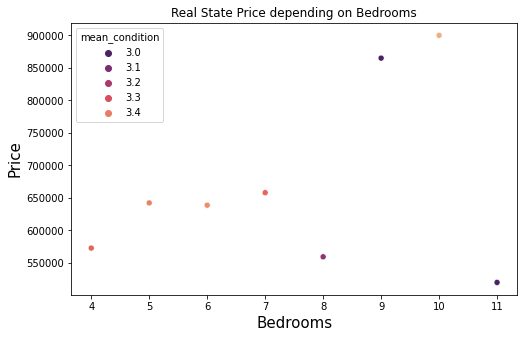

In [37]:
# plot
import seaborn as sns
plt.figure()


sc = sns.scatterplot(data=bedroom_price_cond_df,
            x = 'max_bedrooms',
            y = 'mean_price',
            hue='mean_condition',
            palette="flare_r",
            )
#plt.grid(True)
plt.xlabel('Bedrooms', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Real State Price depending on Bedrooms')


# TODO better scale
# TODO outlier at 10?


In [21]:
# separe date depending on the total price
p_100_500 = data_f[(data_f['price']>=100000) & (data_f['price']<500000)]
p_500_1000 = data_f[(data_f['price']>=500000) & (data_f['price']<1000000)]
p_1000_1500 = data_f[(data_f['price']>=1000000) & (data_f['price']<1500000)]


Text(0.5, 1.0, 'Price per square foot in dependence of the bedrooms')

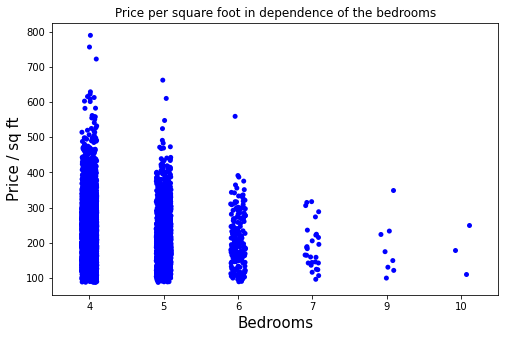

In [22]:
plt.figure()


sns.stripplot(data=p_100_500,
            x = 'bedrooms',
            y = 'sqft_price',
            color='blue',
            )

sns.stripplot(data=p_500_1000,
            x = 'bedrooms',
            y = 'sqft_price',
            color='blue',
            )

sns.stripplot(data=p_1000_1500,
            x = 'bedrooms',
            y = 'sqft_price',
            color='blue',
            )


#plt.grid(True)
plt.xlabel('Bedrooms', fontsize=15)
plt.ylabel('Price / sq ft', fontsize=15)
plt.title('Price per square foot in dependence of the bedrooms')


In [23]:
data_f.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,m2_living,m2_lot,year_month,sqft_price
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,0.000,98136,47.521,-122.393,1360,5000,182.393,465.289,2014-12,308.163
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,0.000,98053,47.656,-122.005,4760,101930,504.374,9485.390,2014-05,226.937
15,9297300055,2015-01-24,650000.000,4,3.000,2950,5000,2.000,0.000,3.000,...,0.000,98126,47.571,-122.375,2140,4000,274.521,465.289,2015-01,220.339
20,6300500875,2014-05-14,385000.000,4,1.750,1620,4980,1.000,0.000,0.000,...,0.000,98133,47.703,-122.341,1400,4980,150.754,463.428,2014-05,237.654
22,7137970340,2014-07-03,285000.000,5,2.500,2270,6300,2.000,0.000,0.000,...,0.000,98092,47.327,-122.169,2240,7005,211.241,586.265,2014-07,125.551


Text(0.5, 1.0, 'Bedrooms against sqft price')

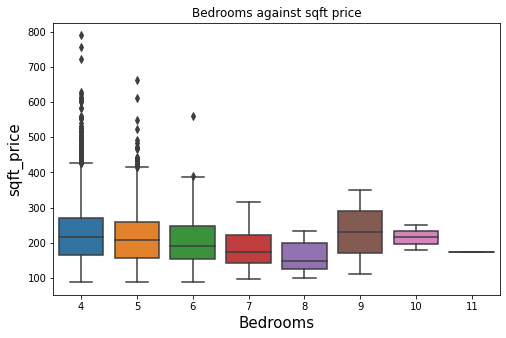

In [24]:
# plotting without mean
# plot
import seaborn as sns
import numpy as np

plt.figure()


sc = sns.boxplot(data=data_f,
            x = 'bedrooms',
            y = 'sqft_price',
            #hue='price',
            #palette="flare_r",
            )
#plt.grid(True)
plt.xlabel('Bedrooms', fontsize=15)
plt.ylabel('sqft_price', fontsize=15)
plt.title('Bedrooms against sqft price')

## Q2: Time dependency?

In [25]:
# explorating data
# data_f.date.describe()

In [26]:
# near inspection into size data
data_f.sort_values('m2_living').m2_living.describe() 

#data_f.m2_living.plot(kind='hist')

count   7530.000
mean     243.841
std       73.363
min       74.446
25%      191.699
50%      232.645
75%      285.688
max      696.073
Name: m2_living, dtype: float64

In [27]:

data_f.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,m2_living,m2_lot,year_month,sqft_price
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,0.000,98136,47.521,-122.393,1360,5000,182.393,465.289,2014-12,308.163
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,0.000,98053,47.656,-122.005,4760,101930,504.374,9485.390,2014-05,226.937
15,9297300055,2015-01-24,650000.000,4,3.000,2950,5000,2.000,0.000,3.000,...,0.000,98126,47.571,-122.375,2140,4000,274.521,465.289,2015-01,220.339
20,6300500875,2014-05-14,385000.000,4,1.750,1620,4980,1.000,0.000,0.000,...,0.000,98133,47.703,-122.341,1400,4980,150.754,463.428,2014-05,237.654
22,7137970340,2014-07-03,285000.000,5,2.500,2270,6300,2.000,0.000,0.000,...,0.000,98092,47.327,-122.169,2240,7005,211.241,586.265,2014-07,125.551


In [28]:
# plot
import plotly.express as px
"""
px.scatter(sqft_price_year_month_mean, 
           x='year_month', 
           y='sqft_price', 
           #size='bedrooms', 
           #color='condition', 
           title='Price changes in time',
           #template='ggplot2',
           #labels=dict(year_month ="Date", price="Price", weather="Condition")
           )
 """          

'\npx.scatter(sqft_price_year_month_mean, \n           x=\'year_month\', \n           y=\'sqft_price\', \n           #size=\'bedrooms\', \n           #color=\'condition\', \n           title=\'Price changes in time\',\n           #template=\'ggplot2\',\n           #labels=dict(year_month ="Date", price="Price", weather="Condition")\n           )\n '

In [29]:
data_f = data_f.sort_values('year_month', ascending=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


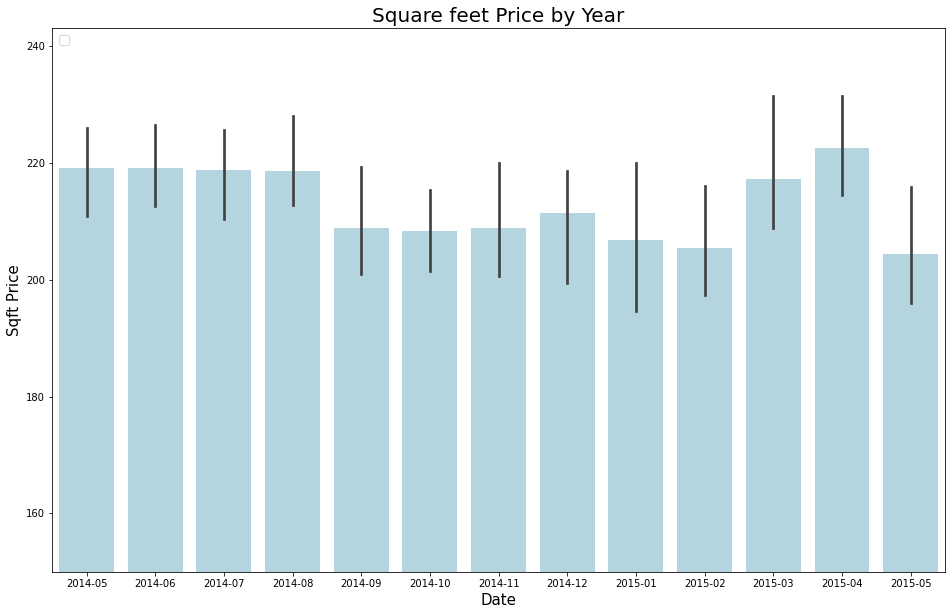

In [30]:
import seaborn as sns
from numpy import median


fig, ax = plt.subplots(figsize=(16,10))

sns.barplot(x='year_month', y='sqft_price', data=data_f, 
            #hue='weather'
            estimator=median,
            color='lightblue'
            )
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sqft Price', fontsize=15)
plt.title('Square feet Price by Year', fontsize=20)
plt.legend(loc='upper left', fontsize=13)
plt.ylim(150)
plt.show(); 
#TODO set different color to the last bar

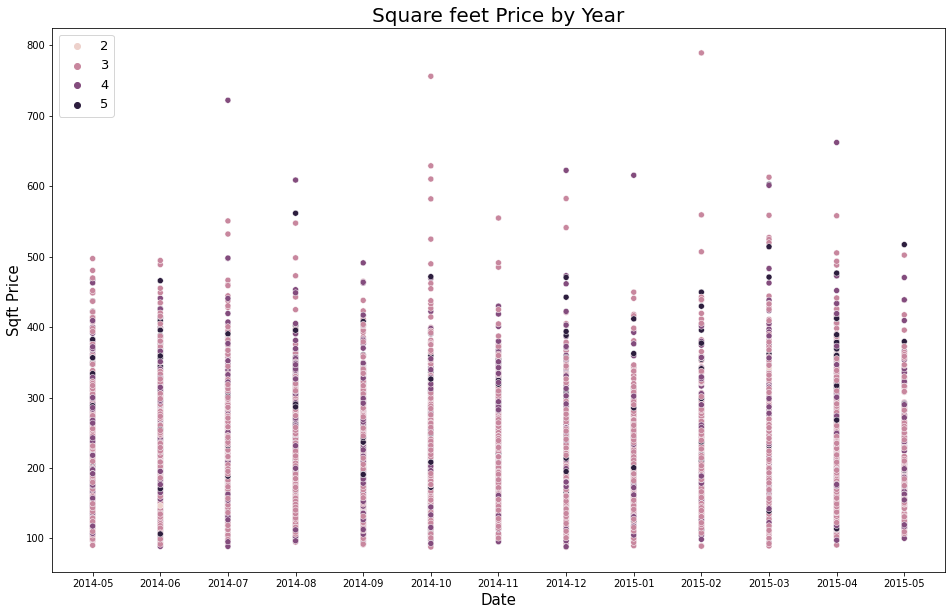

In [31]:
import seaborn as sns
from numpy import median


fig, ax = plt.subplots(figsize=(16,10))

sns.scatterplot(x='year_month', y='sqft_price', data=data_f, 
            hue='condition',
            estimator=median,
            #color='midtblue'
            )
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sqft Price', fontsize=15)
plt.title('Square feet Price by Year', fontsize=20)
plt.legend(loc='upper left', fontsize=13)
#plt.ylim(150)
plt.show(); 

## Q3: location

In [32]:
# previous see the data

In [33]:
# plot map with seaborn
fig = px.scatter_mapbox(data_f, lat="lat", lon="long", 
                        hover_name="sqft_price", 
                        hover_data=["sqft_price"],
                        #color_discrete_sequence=["blue"], 
                        color='sqft_price',
                        zoom=8, width=800, height=600
                        )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

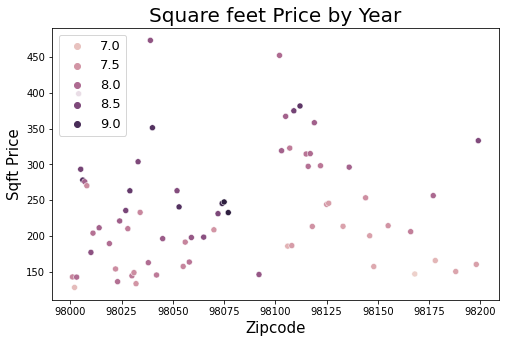

In [34]:
# group by zipcode
price_zipcode = data_f.groupby(['zipcode']).mean().reset_index() #72 rows
price_zipcode.sort_values('zipcode')

fig, ax = plt.subplots()

sns.scatterplot(x='zipcode', y='sqft_price', data=price_zipcode, 
            hue='grade',
            #estimator=median,
            #color='midtblue'
            )
plt.xlabel('Zipcode', fontsize=15)
plt.ylabel('Sqft Price', fontsize=15)
plt.title('Square feet Price by Year', fontsize=20)
plt.legend(loc='upper left', fontsize=13)
#plt.ylim(150)
plt.show();

In [35]:
#plotting sqft_price in map divided by 
fig = px.scatter_mapbox(price_zipcode, lat="lat", lon="long", 
                        hover_name="sqft_price", 
                        hover_data=["sqft_price"],
                        #color_discrete_sequence=["blue"], 
                        color='sqft_price',
                        size='sqft_living',
                        #size='bedrooms',
                        zoom=8, width=800, height=600
                        )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

## Q: does the size increase the price?

Text(0.5, 1.0, 'Real State Price depending square feet living')

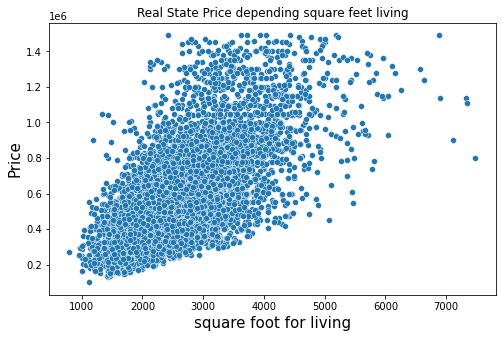

In [47]:
# plotting size(sgft_living) against price (sqft_price) s
# plot
import seaborn as sns
plt.figure()
# price for square foot sq ft
#
sc = sns.scatterplot(data=data_f.sort_values('bedrooms', ascending=False),
            x = 'sqft_living', # x = 'sqft_living'
            y = 'price',
            #hue='bedrooms',
            #palette="ch:s=.25,rot=-.25", #"ch:s=.25,rot=-.25, GnBu_r
            #hue_order=(5,8)
            )
#plt.grid(True)
plt.xlabel('square foot for living', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Real State Price depending square feet living')

In [ ]:
# plotting size(sgft_living) against price (sqft_price) s
# plot
import seaborn as sns
plt.figure()
# price for square foot sq ft
#
sc = sns.scatterplot(data=data_f,
            x = 'sqft_living', # x = 'sqft_living'
            y = 'sqft_price',
            hue='price',
            palette="ch:s=.25,rot=-.25",
            #hue_order=(5,8)
            )
#plt.grid(True)
plt.xlabel('square foot for living', fontsize=15)
plt.ylabel('Price / sq ft', fontsize=15)
plt.title('Price per square foot depending square feet ')

## Q Are the newer houses more expensive?

In [ ]:
data_f.head()
# take a subset of the data
yrb_sqft_price = data_f[['yr_built', 'yr_renovated', 'sqft_living', 'sqft_price', 'condition']]
# create a new colum boolean renovate
def check_renovation(x):
    if x > 100:
        return int(1) # true
    else:
        return int(0) # false

yrb_sqft_price['renovated'] = yrb_sqft_price.yr_renovated.apply(lambda x: check_renovation(x))
yrb_sqft_price.head()
#df_weather_year.year = df_weather_year.year.apply(lambda x: str(x))

# separe date renovated / no renovated
renovated = yrb_sqft_price[(yrb_sqft_price['renovated']==1)]
no_renovated = yrb_sqft_price[(yrb_sqft_price['renovated']==0)]

In [ ]:
# plot
plt.figure()




sns.scatterplot(data=no_renovated,
            x = 'yr_built', 
            y = 'sqft_price',
            )

sns.scatterplot(data=renovated,
            x = 'yr_built', 
            y = 'sqft_price',
            )

#plt.grid(True)
plt.xlabel('Year built', fontsize=15)
plt.ylabel('square feet price', fontsize=15)
plt.title('Real State Price depending on year built')
